In [2]:
from numpy import genfromtxt, zeros
# read the first 4 columns

data = genfromtxt('iris.csv',delimiter=',',usecols=(0,1,2,3))
# read the fifth column
target = genfromtxt('iris.csv',delimiter=',',usecols=(4),dtype=str)

print (data.shape)
print (target.shape)
print (set(target)) # build a collection of unique elements
set(['setosa', 'versicolor', 'virginica'])

(150, 4)
(150,)
{'setosa', 'virginica', 'versicolor'}


{'setosa', 'versicolor', 'virginica'}

In [3]:

t = zeros(len(target))
t[target == 'setosa'] = 1
t[target == 'versicolor'] = 2
t[target == 'virginica'] = 3


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

classifier = RandomForestClassifier()
classifier.fit(data,t) # training on the iris dataset

from sklearn.model_selection import train_test_split
(train, test, t_train, t_test) = train_test_split(data, t,test_size=0.4, random_state=0)
classifier.fit(train,t_train) # train


print(classifier.score(test,t_test)) # test
print(classifier.predict(test))

0.95


[[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]


[[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]
0.9944091248439074


<Figure size 432x288 with 0 Axes>

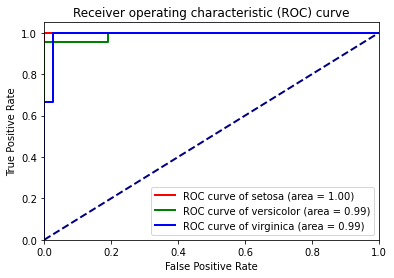

In [6]:
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,plot_roc_curve,auc
print(confusion_matrix(classifier.predict(test)  ,t_test))

#AUC(Area Under Curve)
target_pred_prob = classifier.predict_proba(test)
print(roc_auc_score(t_test,target_pred_prob, multi_class='ovr'))


from pylab import plot, figure, subplot, hist, xlim, show
import matplotlib.pyplot as plt
#ROC()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(t_test, target_pred_prob[:, i],pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()

plt.figure()

colors = ['red', 'green','blue']
targets = ['setosa', 'versicolor','virginica']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             linewidth=2.0, label='ROC curve of {0} (area = {1:0.2f})'.format(targets[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linewidth=2.0, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

0.95
[[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]
0.9635980940328767


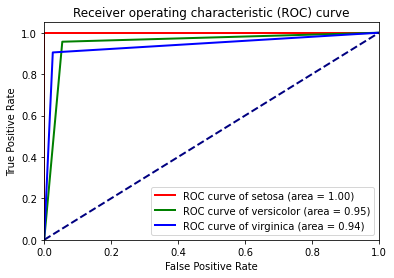

In [8]:
from sklearn.tree import DecisionTreeClassifier 

DTClassiier = DecisionTreeClassifier(random_state=0)
DTClassiier.fit(train,t_train)

print(DTClassiier.score(test,t_test))



#Confusion Matrix
print(confusion_matrix(DTClassiier.predict(test),t_test))

#AUC(Area Under Curve)
target_pred_prob = DTClassiier.predict_proba(test)
print(roc_auc_score(t_test,target_pred_prob, multi_class='ovr'))


#ROC()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(t_test, target_pred_prob[:, i],pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['red', 'green','blue']
targets = ['setosa', 'versicolor','virginica']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             linewidth=2.0, label='ROC curve of {0} (area = {1:0.2f})'.format(targets[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linewidth=2.0, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()




0.95
[[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]
0.993211080167602


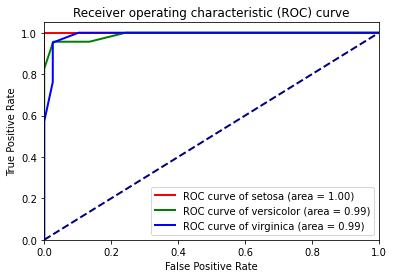

In [9]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier()
KNNClassifier.fit(train,t_train)

#labels for the corresponding test data
predicted_target = KNNClassifier.predict(test)
print(KNNClassifier.score(test,t_test))

#Confusion Matrix
print(confusion_matrix(predicted_target,t_test))

#AUC(Area Under Curve)
target_pred_prob = KNNClassifier.predict_proba(test)
print(roc_auc_score(t_test,target_pred_prob, multi_class='ovr'))

#ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(t_test, target_pred_prob[:, i],pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['red', 'green','blue']
targets = ['setosa', 'versicolor','virginica']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             linewidth=2.0, label='ROC curve of {0} (area = {1:0.2f})'.format(targets[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linewidth=2.0, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()




0.9
[[16  0  0]
 [ 0 20  3]
 [ 0  3 18]]
0.9708705360879274


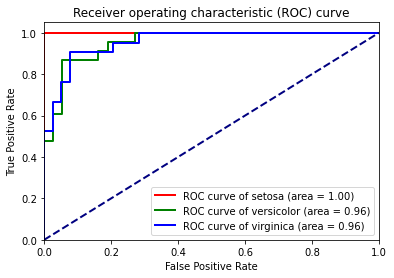

In [10]:

from sklearn.linear_model import LogisticRegression
LogisticRClassifier = LogisticRegression(multi_class='ovr')
LogisticRClassifier.fit(train,t_train)

#labels for the corresponding test data
predicted_target = LogisticRClassifier.predict(test)
print(LogisticRClassifier.score(test,t_test))

#Confusion Matrix
print(confusion_matrix(predicted_target,t_test))

#AUC(Area Under Curve)
target_pred_prob = LogisticRClassifier.predict_proba(test)
print(roc_auc_score(t_test,target_pred_prob, multi_class='ovr'))

#ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(t_test, target_pred_prob[:, i],pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['red', 'green','blue']
targets = ['setosa', 'versicolor','virginica']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             linewidth=2.0, label='ROC curve of {0} (area = {1:0.2f})'.format(targets[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linewidth=2.0, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()




0.95
[[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]
0.9976039106473888


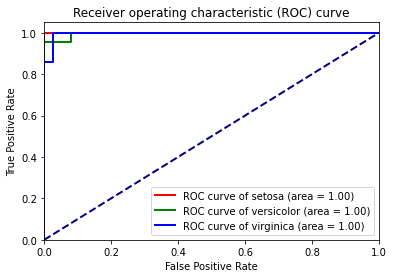

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LinearDiscClassifier = LinearDiscriminantAnalysis()
LinearDiscClassifier.fit(train,t_train)

#labels for the corresponding test data
predicted_target = LinearDiscClassifier.predict(test)
print(LinearDiscClassifier.score(test,t_test))

#Confusion Matrix
print(confusion_matrix(predicted_target,t_test))

#AUC(Area Under Curve)
target_pred_prob = LinearDiscClassifier.predict_proba(test)
print(roc_auc_score(t_test,target_pred_prob, multi_class='ovr'))

#ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(t_test, target_pred_prob[:, i],pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['red', 'green','blue']
targets = ['setosa', 'versicolor','virginica']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             linewidth=2.0, label='ROC curve of {0} (area = {1:0.2f})'.format(targets[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linewidth=2.0, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


0.8833333333333333
[[16  0  0]
 [ 0 22  6]
 [ 0  1 15]]
0.984824767433463


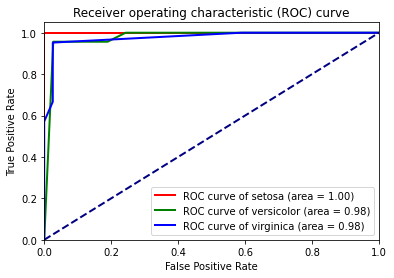

In [14]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

BoostingAlgoClassifier = AdaBoostClassifier()
BoostingAlgoClassifier.fit(train,t_train)

#labels for the corresponding test data
predicted_target = BoostingAlgoClassifier.predict(test)
print(BoostingAlgoClassifier.score(test,t_test))

#Confusion Matrix
print(confusion_matrix(predicted_target,t_test))

#AUC(Area Under Curve)
target_pred_prob = BoostingAlgoClassifier.predict_proba(test)
print(roc_auc_score(t_test,target_pred_prob, multi_class='ovr'))

#ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(t_test, target_pred_prob[:, i],pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['red', 'green','blue']
targets = ['setosa', 'versicolor','virginica']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             linewidth=2.0, label='ROC curve of {0} (area = {1:0.2f})'.format(targets[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linewidth=2.0, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()




0.9666666666666667
[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]
0.9968052141965185


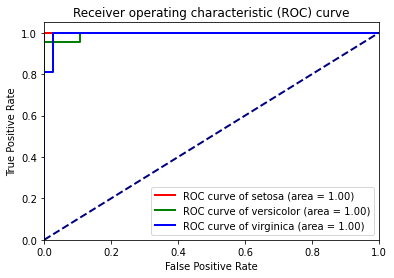

In [13]:



from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QuadraticDiscClassifier = QuadraticDiscriminantAnalysis()
QuadraticDiscClassifier.fit(train,t_train)

#labels for the corresponding test data
predicted_target = QuadraticDiscClassifier.predict(test)
print(QuadraticDiscClassifier.score(test,t_test))

#Confusion Matrix
print(confusion_matrix(predicted_target,t_test))

#AUC(Area Under Curve)
target_pred_prob = QuadraticDiscClassifier.predict_proba(test)
print(roc_auc_score(t_test,target_pred_prob, multi_class='ovr'))

#ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(t_test, target_pred_prob[:, i],pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['red', 'green','blue']
targets = ['setosa', 'versicolor','virginica']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             linewidth=2.0, label='ROC curve of {0} (area = {1:0.2f})'.format(targets[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linewidth=2.0, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# best one is Linear discriminant Analysis wh is close to our analysis.